In [1]:
%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import AllChem
from mol_anal.mol_utils import smiles_to_mol,get_bond_length,get_bond_list
from mol_anal.atom_dict import atom_van_dict
import numpy as np

In [2]:
smiles="[H]C1=CC=C(S)C(OC)=C1"
smiles="[*]C1=CC=C(S[*])C=C1"

unit_symbol="*"

RDKit ERROR: [17:44:53] UFFTYPER: Unrecognized atom type: *_ (0)
RDKit ERROR: [17:44:53] UFFTYPER: Unrecognized atom type: *_ (6)


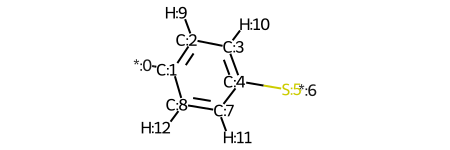

In [3]:
mol=smiles_to_mol(smiles)
conf=mol.GetConformers()[0]
mol

In [37]:
bond_list,repeat_bond=get_bond_list(mol)
bond_list



[(1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (4, 7),
 (7, 8),
 (8, 1),
 (2, 9),
 (3, 10),
 (7, 11),
 (8, 12),
 [1, 5]]

In [83]:
atom_ids

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]

In [65]:

from mol_anal.calc_volume import calc_dVA
from mol_anal.mol_utils import get_atom_ids

atom_ids=get_atom_ids(mol)

V=0

for target_atom_id in atom_ids:
    dV=calc_dVA(mol,conf,bond_list,target_atom_id,repeat_bond)
    V+=dV
    print("dV",target_atom_id,dV)

V

4.494572443425399 (1, 2)
4.4885028080030915 (8, 1)
3.7003482456357806 [1, 5]
dV 1 7.896102779051262
4.494572443425399 (1, 2)
4.276012024301313 (2, 3)
1.1533344927194504 (2, 9)
dV 2 10.655607315669371
4.276012024301313 (2, 3)
4.383411482553314 (3, 4)
1.1505431422270072 (3, 10)
dV 3 10.7695596270339
4.383411482553314 (3, 4)
3.287910695871426 (4, 5)
4.382869012386493 (4, 7)
dV 4 8.5253350853043
3.287910695871426 (4, 5)
3.7003482456357806 [1, 5]
dV 5 13.591267334608327
4.382869012386493 (4, 7)
4.249363277479487 (7, 8)
1.1438349307870064 (7, 11)
dV 7 10.803459055462547
4.249363277479487 (7, 8)
4.4885028080030915 (8, 1)
1.1539097486087153 (8, 12)
dV 8 10.687750442024239
1.1533344927194504 (2, 9)
dV 9 19.42619178339608
1.1505431422270072 (3, 10)
dV 10 19.428983133888526
1.1438349307870064 (7, 11)
dV 11 19.43569134532853
1.1539097486087153 (8, 12)
dV 12 19.42561652750682


150.64556442927386

In [68]:
from mol_anal.calc_volume import calc_s
calc_s(mol,conf,[12,8],repeat_bond)


(4.205077959300608, 1.2)

In [79]:
bond=(8,12)
atom_id1 = bond[0]
atom_id2 = bond[1]
atom1 = mol.GetAtomWithIdx(atom_id1).GetSymbol()
atom2 = mol.GetAtomWithIdx(atom_id2).GetSymbol()

Ri = atom_van_dict[atom1]
Rj = atom_van_dict[atom2]

if set(repeat_bond) == set((atom_id1, atom_id2)):
    di = 1.7
else:
    di = get_bond_length(conf, atom_id1, atom_id2)

hi = Ri-(Ri**2+di**2-Rj**2)/(2*di)
s = 1/3*np.pi*hi**2*(3*Ri-hi)

In [81]:
Ri,di,Rj,s

(1.7, 1.081124971193227, 1.2, 1.1539097486087153)

In [82]:
di
hi = Ri-(Ri**2+di**2-Rj**2)/(2*di)

s = 1/3*np.pi*hi**2*(3*Ri-hi)
hi,s

(0.4888397395690631, 1.1539097486087153)

In [55]:
s

1.1539097486087153

In [75]:
sigma=0
neighbor_atom_bonds = [
    bond for bond in bond_list if target_atom_id in bond]
for bond in neighbor_atom_bonds:
    s, Ri = calc_s(mol, conf, bond, repeat_bond)
    print(s,  bond)
    sigma += s

dVa = 4/3*np.pi*Ri**3-sigma

sigma

1.1539097486087153 (8, 12)


1.1539097486087153

In [77]:
s

1.1539097486087153

In [74]:
Ri

1.7